In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [ ]:
df = pd.read_csv( '/kaggle/input/us-accidents/US_Accidents_March23.csv')

In [5]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [6]:
df.tail()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day
7728393,A-7777761,Source1,2,2019-08-23 18:52:06,2019-08-23 19:21:31,34.13393,-117.23092,34.13736,-117.23934,0.537,...,False,False,False,False,False,False,Day,Day,Day,Day


In [7]:
df.shape

(7728394, 46)

In [8]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [10]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [11]:
df.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [12]:
df.duplicated().sum()


0

In [13]:
top_cities_accidents=df['City'].value_counts()
top_cities_accidents[:25]

City
Miami            186917
Houston          169609
Los Angeles      156491
Charlotte        138652
Dallas           130939
Orlando          109733
Austin            97359
Raleigh           86079
Nashville         72930
Baton Rouge       71588
Atlanta           68186
Sacramento        66264
San Diego         55504
Phoenix           53974
Minneapolis       51488
Richmond          48845
Oklahoma City     46092
Jacksonville      42447
Tucson            39304
Columbia          38178
San Antonio       37961
Greenville        37802
Saint Paul        37383
Seattle           36564
Portland          35399
Name: count, dtype: int64

## "Which cities have the highest number of accidents?"



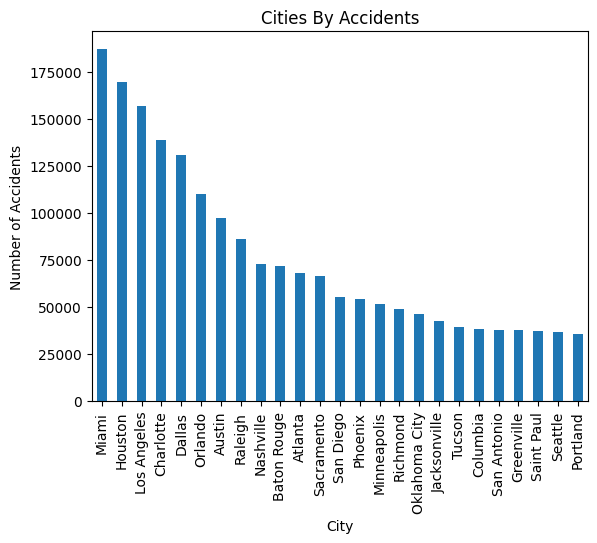

In [14]:
top_cities_accidents[:25].plot(kind='bar')
plt.title("Cities By Accidents")
plt.ylabel("Number of Accidents")
plt.show()

In [15]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

# Extract year
df['Year'] = df['Start_Time'].dt.year
# Count accidents per year
accidents_per_year = df['Year'].value_counts().sort_index()

# Print counts
print(accidents_per_year)

Year
2016.0     410821
2017.0     717290
2018.0     893426
2019.0     954302
2020.0    1161598
2021.0    1412433
2022.0    1268806
2023.0     166552
Name: count, dtype: int64


## How many accidents occurred each year?

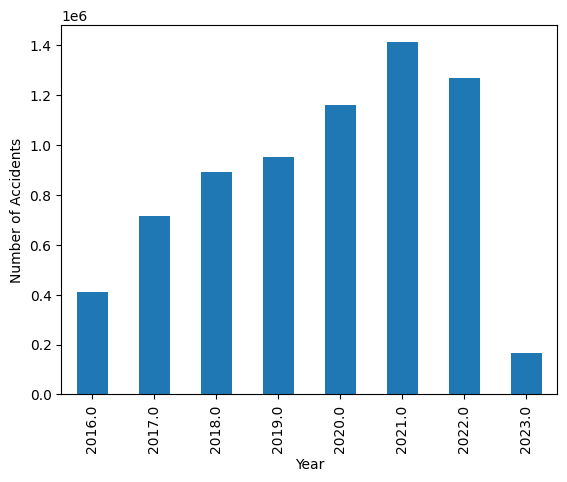

In [16]:
accidents_per_year.plot(kind='bar')
plt.ylabel("Number of Accidents")
plt.yticks()
plt.show()

## Which city had the most accidents each year, and how many accidents were recorded there?


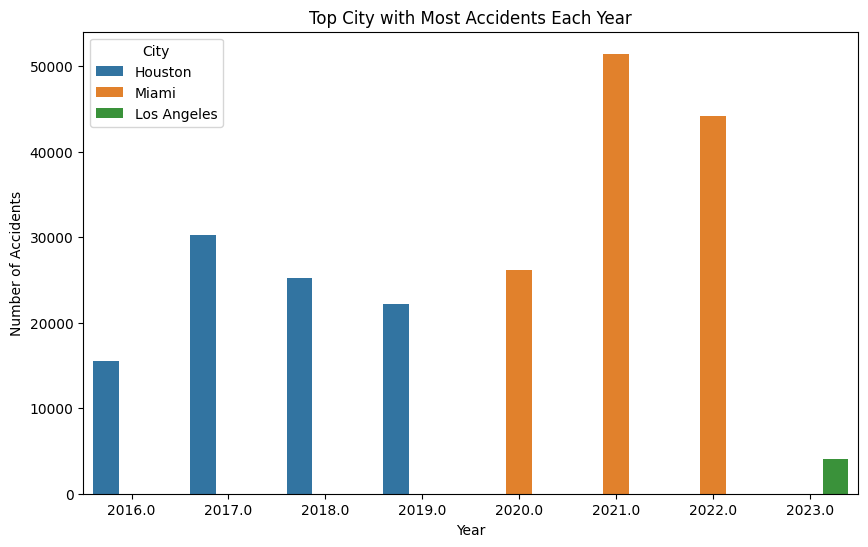

In [27]:
# 3. Group by Year & City and count accidents
city_year_counts = df.groupby(['Year', 'City']).size().reset_index(name='Count')

# 4. Get the top city for each year
top_cities_per_year = city_year_counts.loc[city_year_counts.groupby('Year')['Count'].idxmax()]

# 5. Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Year', y='Count', hue='City', data=top_cities_per_year, palette='tab10')
plt.title("Top City with Most Accidents Each Year")
plt.ylabel("Number of Accidents")
plt.xlabel("Year")
plt.legend(title="City")
plt.show()



## Which month had the most accidents each year, and how many accidents occurred during that month?


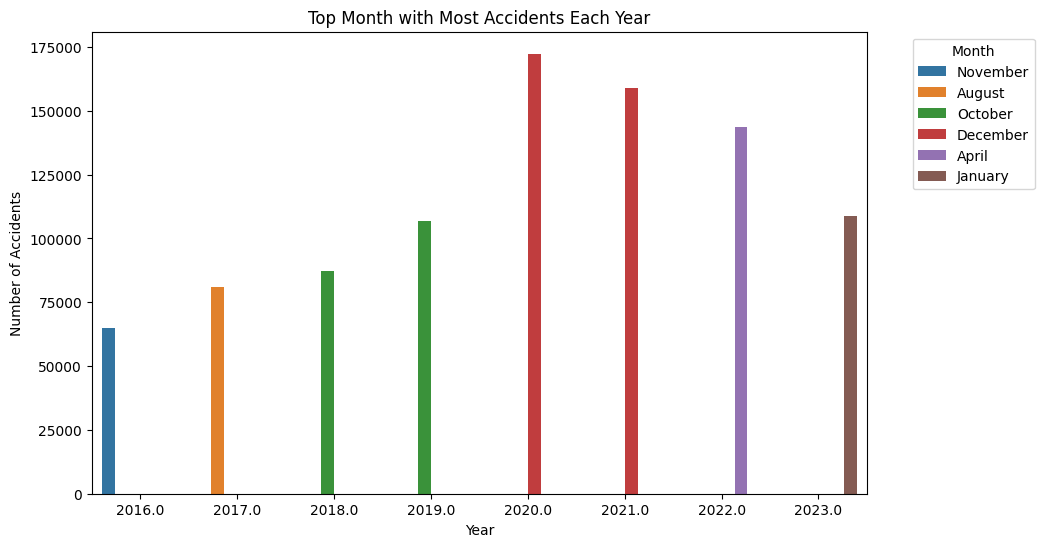

In [18]:
df['Month']=df['Start_Time'].dt.month_name()

# 3. Group by Year & Month and count accidents
month_year_counts = df.groupby(['Year', 'Month']).size().reset_index(name='Count')

# 4. Get the top month for each year
top_months_per_year = month_year_counts.loc[month_year_counts.groupby('Year')['Count'].idxmax()]

# 5. Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Year', y='Count', hue='Month', data=top_months_per_year, palette='tab10')
plt.title("Top Month with Most Accidents Each Year")
plt.ylabel("Number of Accidents")
plt.xlabel("Year")
plt.legend(title="Month", bbox_to_anchor=(1.05, 1), loc='upper left')

## How does the number of accidents vary with temperature?


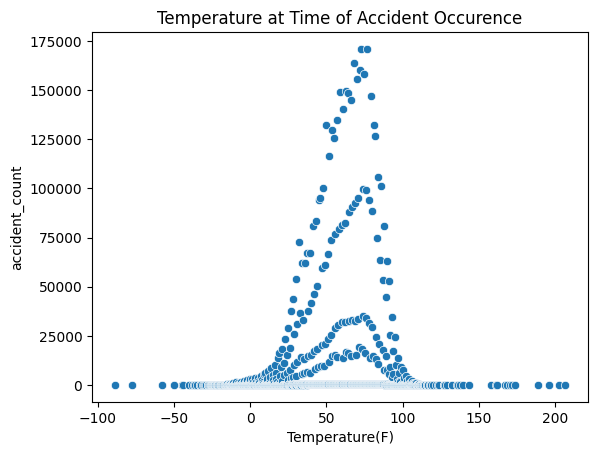

In [ ]:
groupby_Temperature= df.groupby('Temperature(F)').size().reset_index(name='accident_count')

sns.scatterplot(data=groupby_Temperature, x='Temperature(F)', y='accident_count')
plt.title("Temperature at Time of Accident Occurence")
plt.show()


## How many accidents occurred in each state?

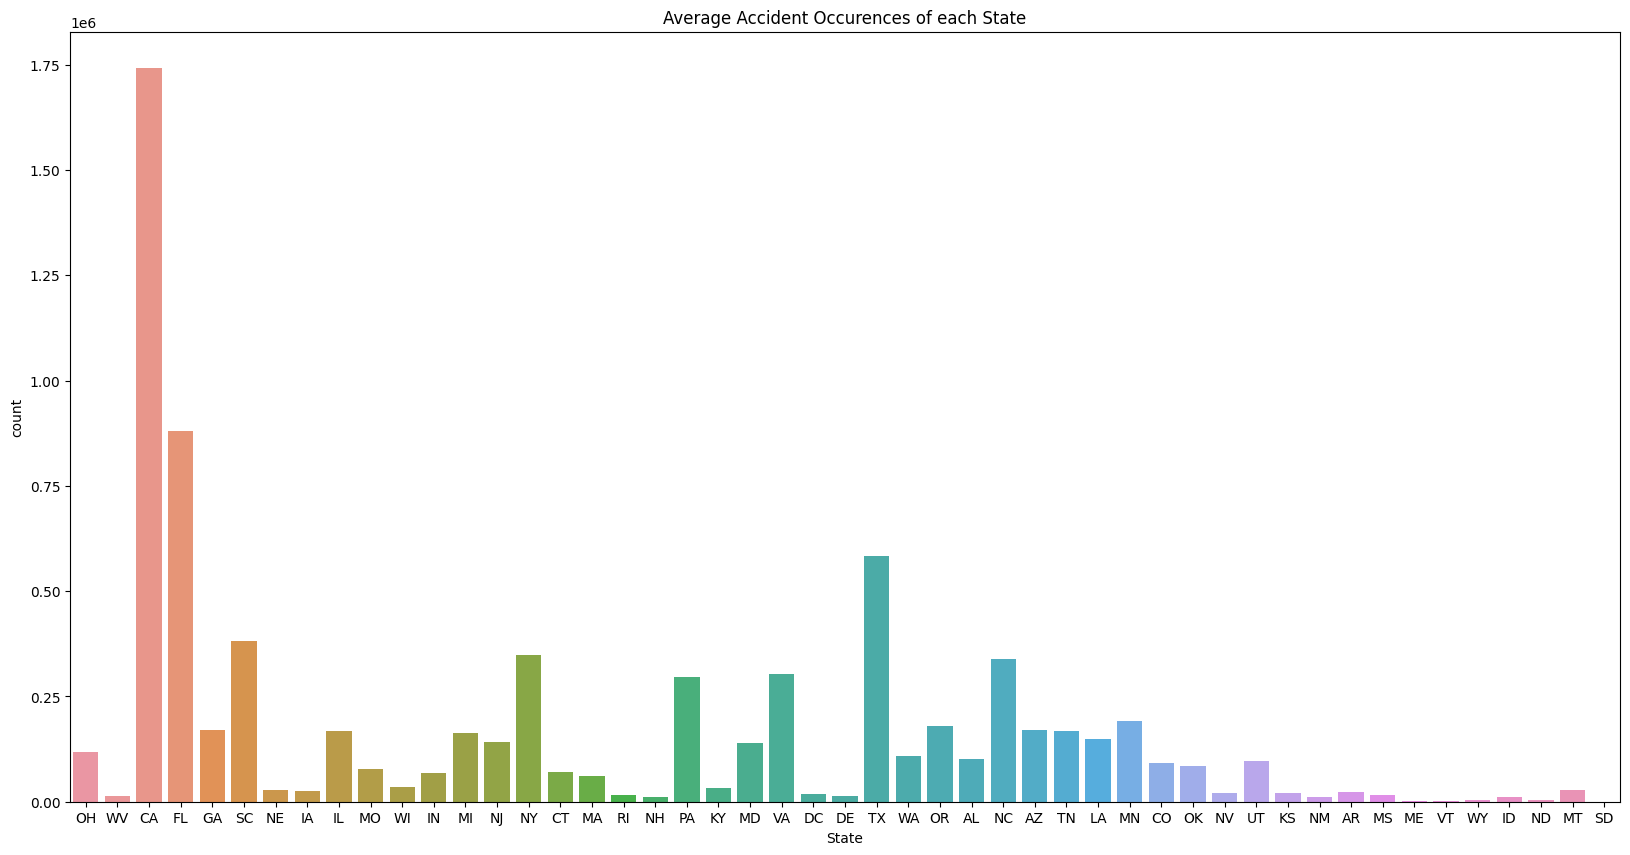

In [20]:
plt.figure(figsize=(20,10))
sns.countplot(data=df,x="State")
plt.title("Average Accident Occurences of each State")
plt.show()

## How does accident severity vary by different weather conditions?


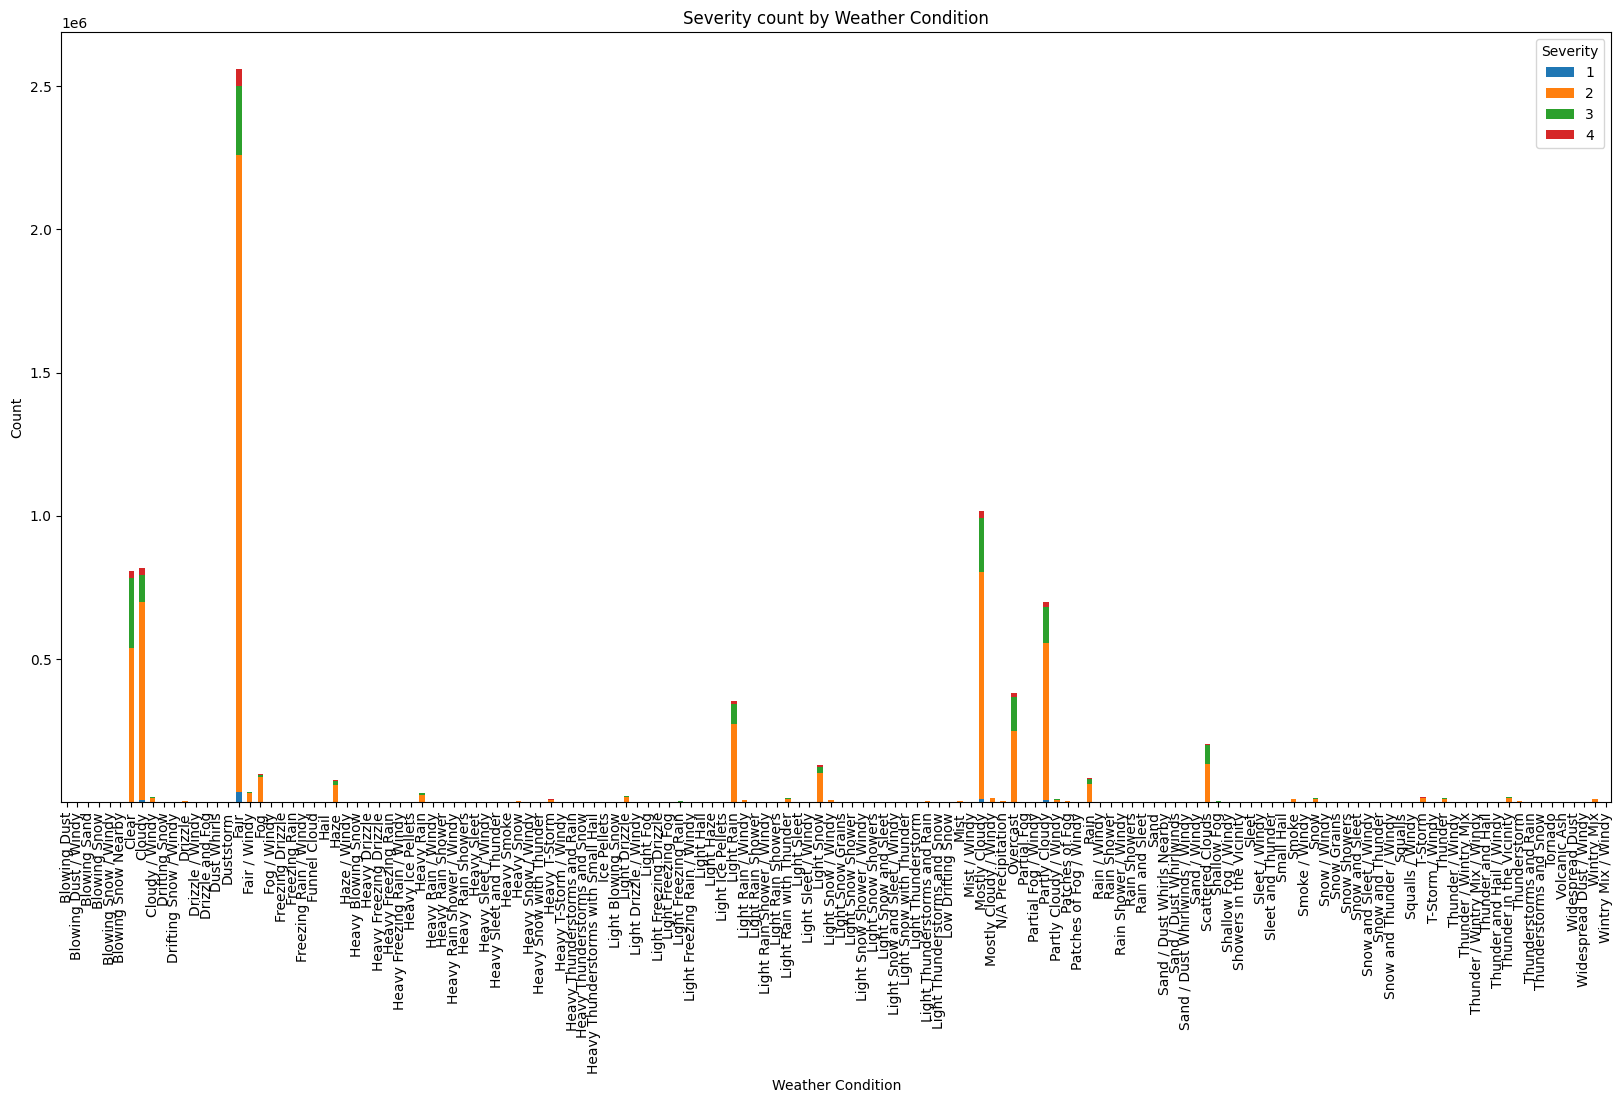

In [22]:
# Crosstab
ct = pd.crosstab(df["Weather_Condition"], df["Severity"]) 

# Bar plot (stacked)
ct.plot(kind='bar', stacked=True, figsize=(20,10))
plt.title("Severity count by Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("Count")
plt.legend(title="Severity")
plt.show()



## 1. How does accident severity vary between sunrise and sunset?

## 2. How does accident severity vary across different phases of civil twilight?



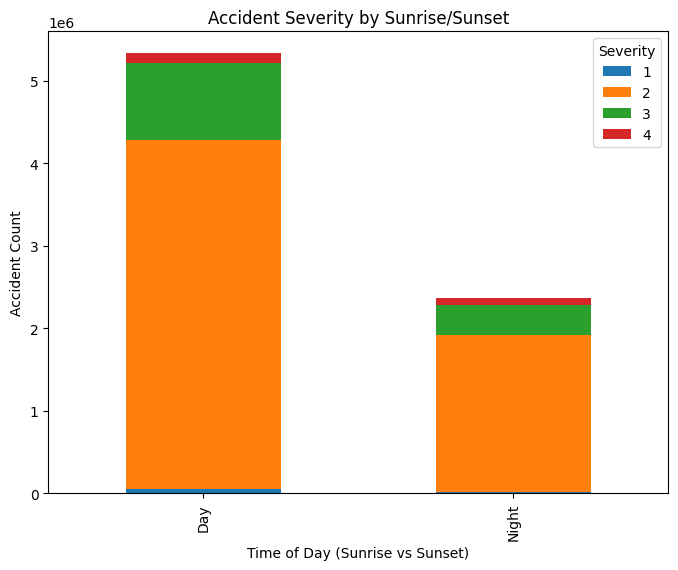

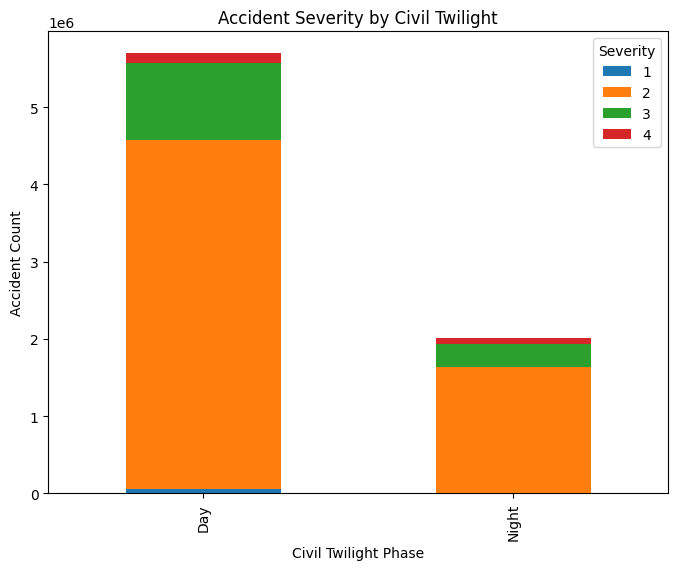

In [23]:
# Crosstab for Sunrise_Sunset
ct_sun = pd.crosstab(df["Sunrise_Sunset"], df["Severity"])

# Plot
ct_sun.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title("Accident Severity by Sunrise/Sunset")
plt.xlabel("Time of Day (Sunrise vs Sunset)")
plt.ylabel("Accident Count")
plt.legend(title="Severity")
plt.show()

# Crosstab for Civil_Twilight
ct_twilight = pd.crosstab(df["Civil_Twilight"], df["Severity"])

ct_twilight.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title("Accident Severity by Civil Twilight")
plt.xlabel("Civil Twilight Phase")
plt.ylabel("Accident Count")
plt.legend(title="Severity")
plt.show()


## How does the number of accidents vary by state over different years?


In [63]:
state_year_count = pd.pivot_table(df, values='ID', index=['State'], columns=['Year'], aggfunc='count').style.bar(axis=1)
state_year_count

Year,2016.000000,2017.000000,2018.000000,2019.000000,2020.000000,2021.000000,2022.000000,2023.000000
State,,,,,,,,
AL,135.000000,2904.000000,14100.000000,19238.000000,19972.000000,22211.000000,16719.000000,611.000000
AR,26.000000,134.000000,598.000000,991.000000,2966.000000,6392.000000,6513.000000,765.000000
AZ,2770.000000,12329.000000,22706.000000,24529.000000,29231.000000,30068.000000,28176.000000,4180.000000
CA,140452.000000,152081.000000,156898.000000,213455.000000,281658.000000,306030.000000,266275.000000,50287.000000
CO,1324.000000,7105.000000,14149.000000,17620.000000,13843.000000,10690.000000,15222.000000,2882.000000
CT,4210.000000,6742.000000,6421.000000,5457.000000,9126.000000,14434.000000,14288.000000,1712.000000
DC,454.000000,763.000000,955.000000,1487.000000,2570.000000,4163.000000,4893.000000,471.000000
DE,281.000000,891.000000,1644.000000,1620.000000,2448.000000,3514.000000,2299.000000,106.000000
FL,37060.000000,60706.000000,65781.000000,60313.000000,127108.000000,213597.000000,186101.000000,14959.000000
